
Descriptive statistics for ieltsMarks:
count    1.310000e+02
mean    -9.966582e-16
std      1.003839e+00
min     -2.945268e+00
25%     -1.230468e+00
50%      4.843330e-01
75%      4.843330e-01
max      2.199134e+00
Name: ieltsMarks, dtype: float64


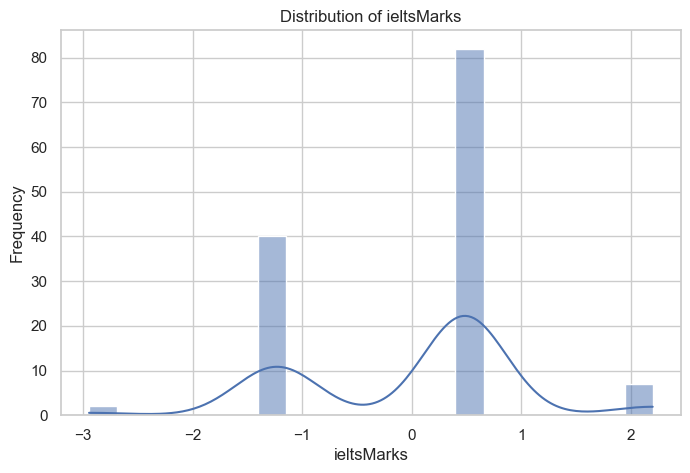


Descriptive statistics for toefl_ibt:
count    1.310000e+02
mean     4.339192e-16
std      1.003839e+00
min     -1.839830e+00
25%      1.340224e-02
50%      1.340224e-02
75%      8.912489e-01
max      1.574018e+00
Name: toefl_ibt, dtype: float64


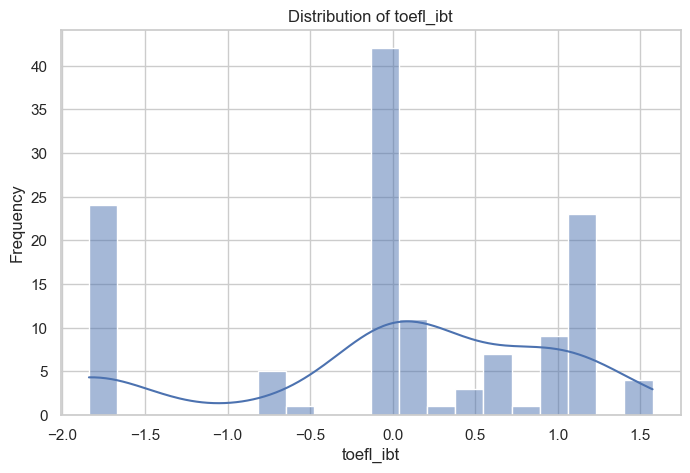


Descriptive statistics for minimumGPA:
count    1.310000e+02
mean     1.545837e-15
std      1.003839e+00
min     -1.763820e+00
25%     -1.053957e+00
50%      1.083760e-02
75%      1.075632e+00
max      1.075632e+00
Name: minimumGPA, dtype: float64


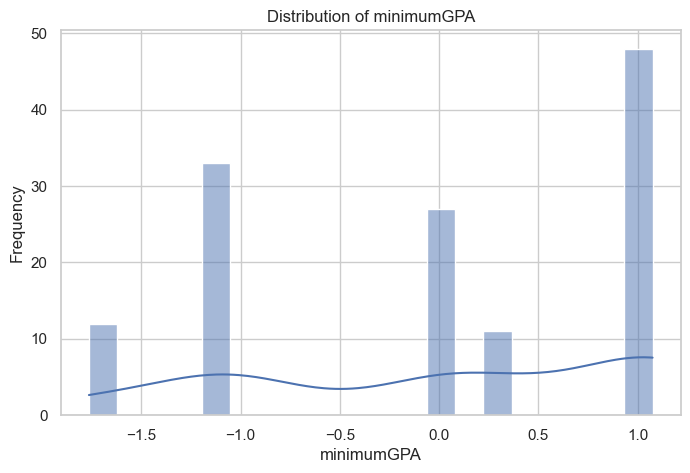


Descriptive statistics for tuitionFeeUSD:
count    1.310000e+02
mean    -2.305196e-16
std      1.003839e+00
min     -1.787467e+00
25%     -8.268065e-01
50%     -1.514566e-02
75%      6.839653e-01
max      3.252549e+00
Name: tuitionFeeUSD, dtype: float64


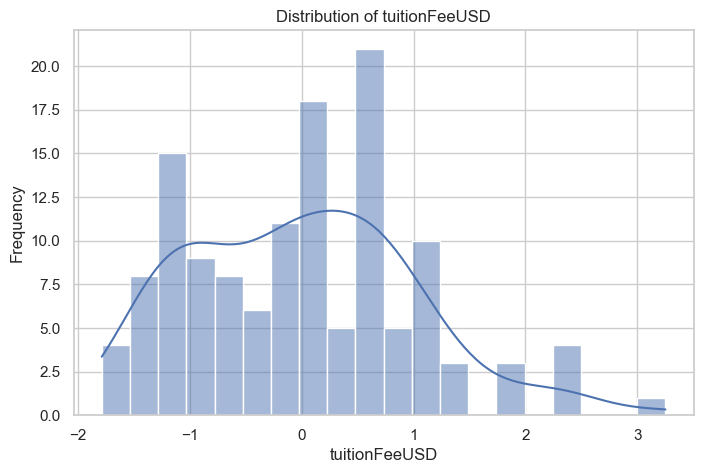


Correlation with target (universityRankingNum):
                                     universityRankingNum
universityRankingNum                             1.000000
country_UK                                       0.283347
uniqueID                                         0.171055
country_CAD                                      0.132522
courseLevelSimplified_Undergraduate              0.112899
country_US                                       0.058256
country_NZ                                      -0.073884
courseLevelSimplified_Postgraduate              -0.112899
toefl_ibt                                       -0.183309
toefl_squared                                   -0.191945
minimumGPA                                      -0.212284
ielts_toefl_interaction                         -0.233314
ielts_squared                                   -0.300068
ieltsMarks                                      -0.300209
tuitionFeeUSD                                   -0.323100
gpa_tuition_interaction

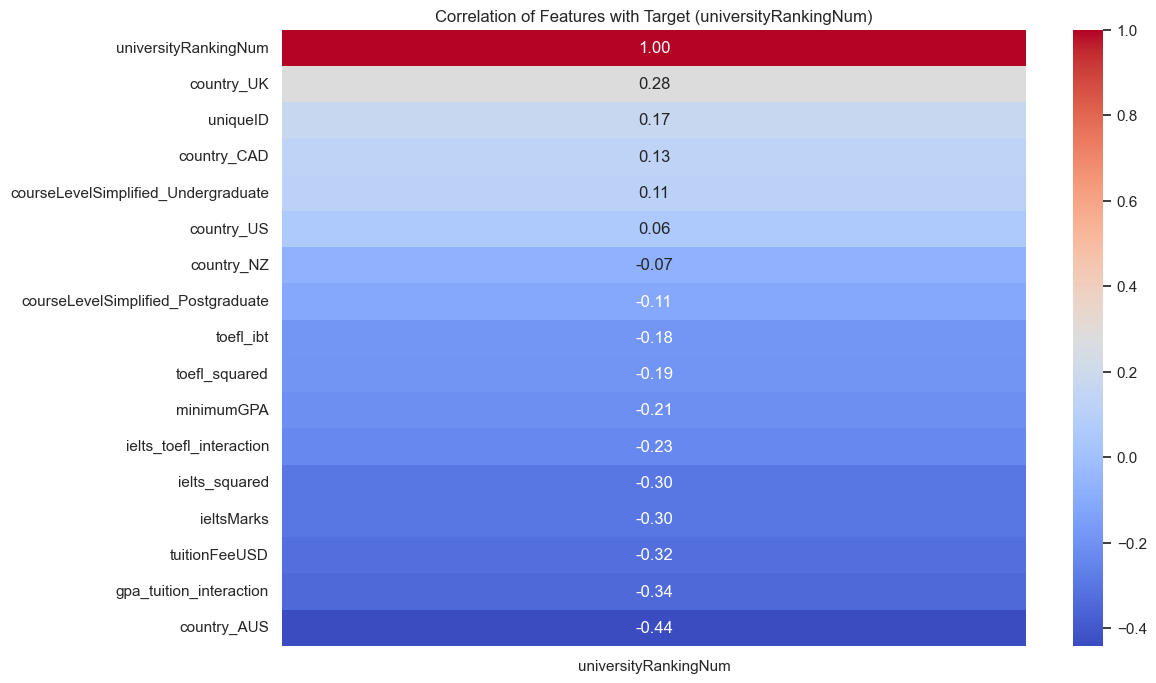


Outliers for ieltsMarks:
Series([], Name: ieltsMarks, dtype: float64)


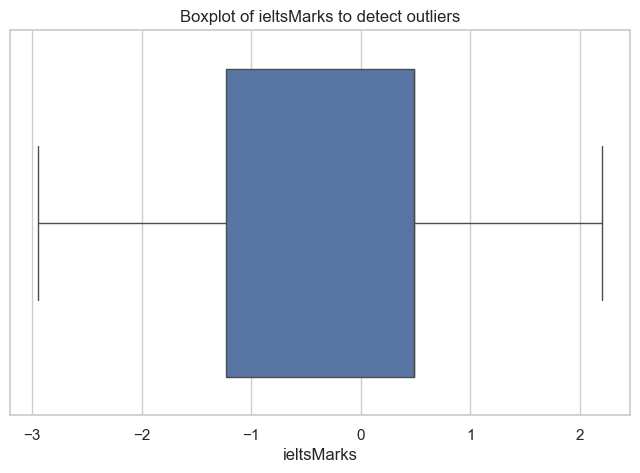


Outliers for toefl_ibt:
23    -1.839830
29    -1.839830
32    -1.839830
50    -1.839830
51    -1.839830
53    -1.839830
57    -1.839830
70    -1.742291
77    -1.839830
78    -1.839830
82    -1.839830
84    -1.742291
89    -1.839830
90    -1.839830
91    -1.839830
93    -1.839830
95    -1.742291
112   -1.839830
113   -1.839830
114   -1.839830
115   -1.839830
116   -1.839830
117   -1.839830
118   -1.839830
Name: toefl_ibt, dtype: float64


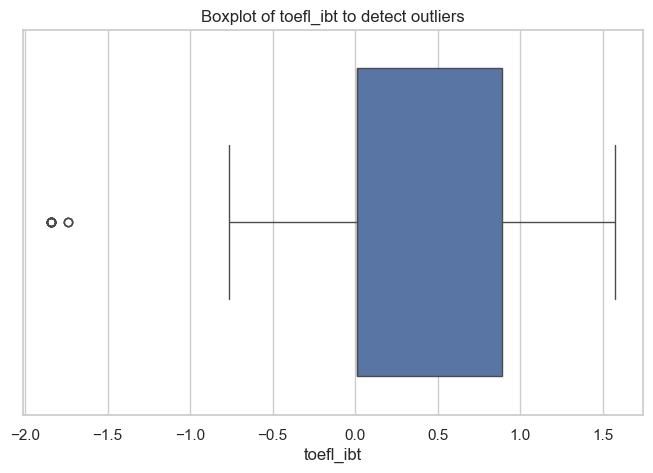


Outliers for minimumGPA:
Series([], Name: minimumGPA, dtype: float64)


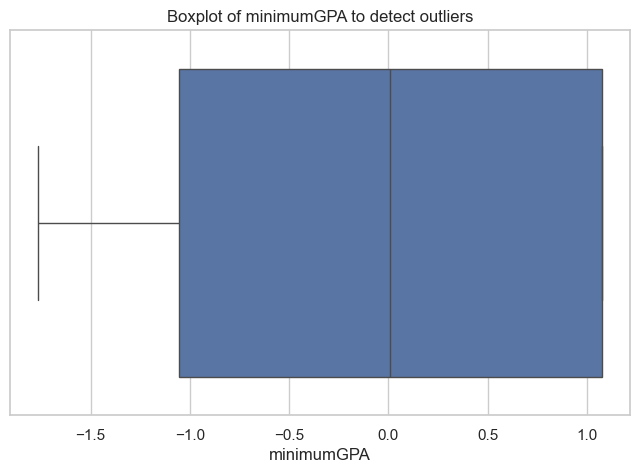


Outliers for tuitionFeeUSD:
108    3.252549
Name: tuitionFeeUSD, dtype: float64


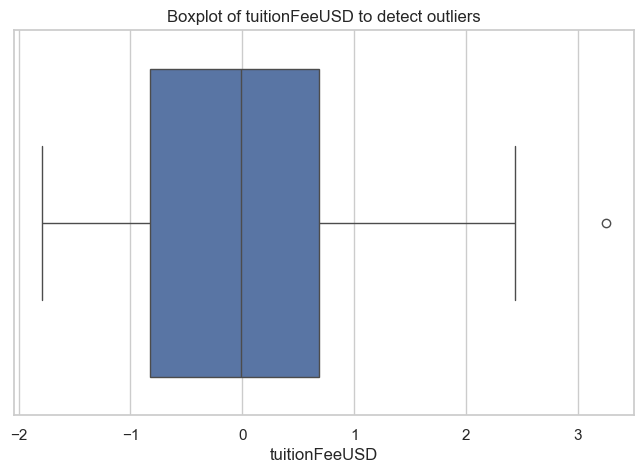


Learning Curve (RMSE values at each training size step):
Training Size: 10, Training RMSE: 1.7178880648009133e-07, Validation RMSE: 1.9755699825518875
Training Size: 20, Training RMSE: 4.4851453151158096e-07, Validation RMSE: 2.4690221469536975
Training Size: 31, Training RMSE: 5.529574518513437e-07, Validation RMSE: 1.3451558720092365
Training Size: 41, Training RMSE: 3.7562571649521893e-07, Validation RMSE: 2.1004645008162983
Training Size: 52, Training RMSE: 5.108097617048626e-07, Validation RMSE: 1.3519751389726227
Training Size: 62, Training RMSE: 6.873976482393577e-07, Validation RMSE: 1.524309449652367
Training Size: 72, Training RMSE: 5.512128753213862e-07, Validation RMSE: 1.3145491465357526
Training Size: 83, Training RMSE: 8.595793392240254e-07, Validation RMSE: 1.2346325683207904
Training Size: 93, Training RMSE: 1.366703518184608e-06, Validation RMSE: 1.1575847741124374
Training Size: 104, Training RMSE: 1.1980819112906277e-06, Validation RMSE: 1.1792214973041062


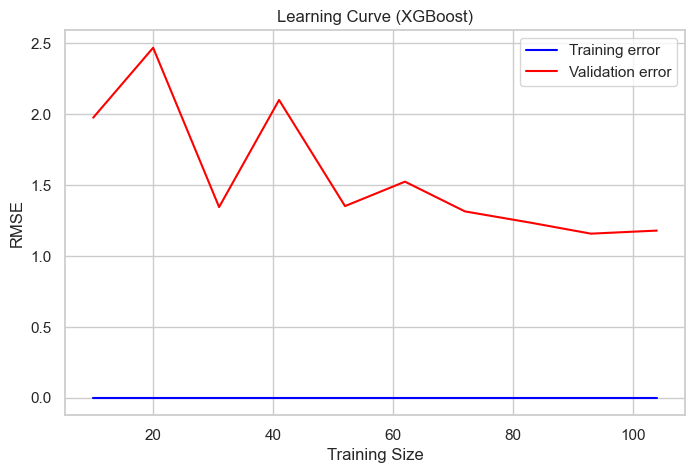

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/processed/ml_data6.csv')

# Set plot style
sns.set(style="whitegrid")

# Visualize the distribution of key features and print summary statistics
features_to_visualize = ['ieltsMarks', 'toefl_ibt', 'minimumGPA', 'tuitionFeeUSD']
for feature in features_to_visualize:
    # Print descriptive statistics
    print(f"\nDescriptive statistics for {feature}:")
    print(df[feature].describe())
    
    # Plot the histogram and KDE
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Visualizing correlation heatmap of features with the target and print correlation matrix
corr = df.corr()
print("\nCorrelation with target (universityRankingNum):")
print(corr[['universityRankingNum']].sort_values(by='universityRankingNum', ascending=False))

# Plot the correlation heatmap for features vs. target
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['universityRankingNum']].sort_values(by='universityRankingNum', ascending=False), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Features with Target (universityRankingNum)')
plt.show()

# Checking for outliers using IQR and print outliers
for feature in features_to_visualize:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    print(f"\nOutliers for {feature}:")
    print(outliers[feature])
    
    # Plot boxplot to visualize outliers
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature} to detect outliers')
    plt.show()

# Visualize model learning curve and print RMSE at each step
from sklearn.model_selection import learning_curve
from xgboost import XGBRegressor

# Prepare data
X = df.drop(columns=['universityRankingNum', 'uniqueID'])
y = df['universityRankingNum']

# Initialize model
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Calculate mean RMSE for train and validation scores
train_scores_mean = np.mean(-train_scores, axis=1)  # Convert negative MSE to positive RMSE
validation_scores_mean = np.mean(-validation_scores, axis=1)

# Print learning curve RMSE
print("\nLearning Curve (RMSE values at each training size step):")
for i, size in enumerate(train_sizes):
    print(f"Training Size: {size}, Training RMSE: {train_scores_mean[i]}, Validation RMSE: {validation_scores_mean[i]}")

# Plot learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label='Training error', color='blue')
plt.plot(train_sizes, validation_scores_mean, label='Validation error', color='red')
plt.title('Learning Curve (XGBoost)')
plt.xlabel('Training Size')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.show()

Learning Curve Results:
Training RMSE (Mean): 6.473786929409373e-07
Validation RMSE (Mean): 0.8432515943112875
Training size: 8, Training RMSE: 0.0000, Validation RMSE: 1.7939
Training size: 16, Training RMSE: 0.0000, Validation RMSE: 0.9341
Training size: 24, Training RMSE: 0.0000, Validation RMSE: 0.8499
Training size: 33, Training RMSE: 0.0000, Validation RMSE: 0.7005
Training size: 41, Training RMSE: 0.0000, Validation RMSE: 0.5845
Training size: 49, Training RMSE: 0.0000, Validation RMSE: 0.6904
Training size: 58, Training RMSE: 0.0000, Validation RMSE: 0.6861
Training size: 66, Training RMSE: 0.0000, Validation RMSE: 0.7677
Training size: 74, Training RMSE: 0.0000, Validation RMSE: 0.7234
Training size: 83, Training RMSE: 0.0000, Validation RMSE: 0.7021


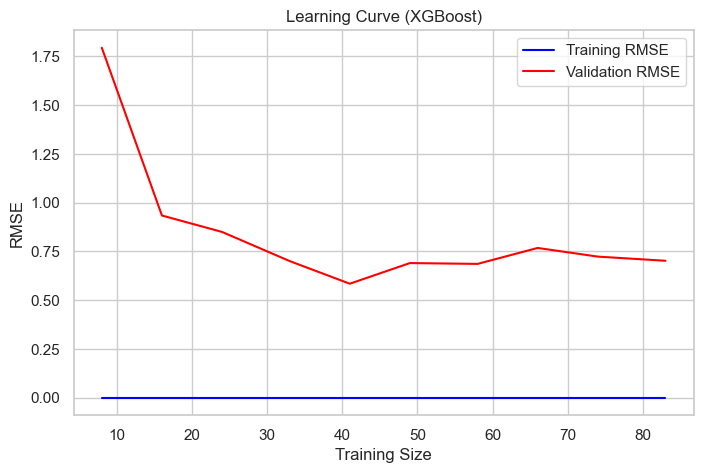

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('../data/processed/ml_data12.csv')

# Define features and target variable
X = df.drop(columns=['universityRankingNum', 'uniqueID'])
y = df['universityRankingNum']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Calculate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Convert negative MSE scores to RMSE (Root Mean Squared Error)
train_rmse = np.mean(-train_scores, axis=1)
val_rmse = np.mean(-val_scores, axis=1)

# Calculate the mean and standard deviation of RMSE for each training size
train_rmse_mean = np.mean(train_rmse)
val_rmse_mean = np.mean(val_rmse)

# Print the learning curve data (text format output)
print("Learning Curve Results:")
print("Training RMSE (Mean):", train_rmse_mean)
print("Validation RMSE (Mean):", val_rmse_mean)

# Print RMSE at each training size
for i, size in enumerate(train_sizes):
    print(f"Training size: {size}, Training RMSE: {train_rmse[i]:.4f}, Validation RMSE: {val_rmse[i]:.4f}")

# Plot the learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse, label="Training RMSE", color='blue')
plt.plot(train_sizes, val_rmse, label="Validation RMSE", color='red')
plt.title('Learning Curve (XGBoost)')
plt.xlabel('Training Size')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.grid(True)
plt.show()